In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from six.moves import cPickle


# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

In [2]:
# Load meta data from given file path
meta_file = r"cifar-10-batches-py\batches.meta"
f = open(meta_file, 'rb')
meta_data = cPickle.load(f, encoding='latin1')
f.close
print(meta_data['label_names'])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
def process_data(Path):
    f = open(Path, 'rb')
    datadict = cPickle.load(f, encoding='latin1')
    f.close()
    X = datadict['data']
    y = datadict['labels']
    return X, y

In [4]:
#Process data from given file path
p = r"cifar-10-batches-py\data_batch_1"
X, y = process_data(p)
X = np.array(X)
y = np.array(y)
X_train, X_last_test, y_train, y_last_test = train_test_split(X, y, test_size=0.20, random_state=seed)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)


# X and Y are original shape
print(X.shape)
print(y.shape)

# X_train and y_train are for training
print(X_train.shape)
print(y_train.shape)

# X_test and y_test are for validation
print(X_test.shape)
print(y_test.shape)

# x_last_test and y_last_test are for
#a test dataset that is only used once at the end of your project for final evaluation of models
print(X_last_test.shape)
print(y_last_test.shape)


(10000, 3072)
(10000,)
(6000, 3072)
(6000,)
(2000, 3072)
(2000,)
(2000, 3072)
(2000,)


# KNN


In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer



[1.0, 0.45116666666666666, 0.38, 0.31216666666666665, 0.29083333333333333, 0.282, 0.2748333333333333, 0.2648333333333333, 0.24533333333333332]
[0.2685, 0.275, 0.288, 0.267, 0.2555, 0.2515, 0.2415, 0.2415, 0.237]
best 10


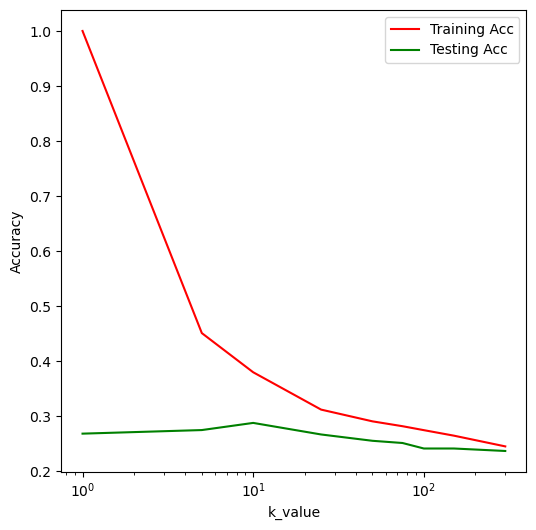

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr = scaler.transform(X_train)
X_te = scaler.transform(X_test)
X_final = scaler.transform(X_last_test)

figure, axes = plt.subplots(1, figsize=(6, 6))

k_values = [1,5,10,25,50,75,100,150,300]
tr_acc = []
te_acc = []
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_tr,y_train)
    
    p_tr = knn.predict(X_tr)
    p_te = knn.predict(X_te)
    
    tr_acc.append(accuracy_score(y_train, p_tr))
    te_acc.append(accuracy_score(y_test, p_te))

    
print(tr_acc)
print(te_acc)

print("best",k_values[np.argmax(te_acc)])
plt.semilogx(k_values, tr_acc, label='Training Acc', color='red')
plt.semilogx(k_values, te_acc, label='Testing Acc', color='green')
plt.xlabel('k_value')
plt.ylabel('Accuracy')
plt.legend()


In [9]:
best_knn = KNeighborsClassifier(n_neighbors=10)
best_knn.fit(X_tr, y_train)
p_final = knn.predict(X_final)
print(accuracy_score(y_last_test, p_final))

0.25


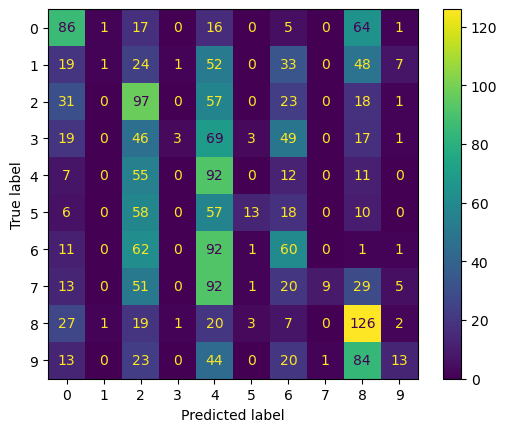

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
m = confusion_matrix(y_last_test, p_final)
cm = ConfusionMatrixDisplay(m)
cm.plot()

Based on the trainings with k values of [1,5,10,25,50,75,100,150,300], the bestfit model for Cifar-10 is when k is 10 with an accuracy of 0.288. 
When tested with the final set, the accuracy score is 0.25 with confusion matrix on the side to visualize the accuracy. 
Since the accuracy is super low, we conclude that KNN is not a good model for image classification/Cifar-10. 